<a href="https://colab.research.google.com/github/raneemalshehri/project-automated-customers-reviews/blob/main/main_task1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kagglehub

# load the dataset

In [ ]:
# Download the latest version of a dataset from Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/consumer-reviews-of-amazon-products


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score


In [ ]:
# List files in the dataset directory
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv
/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv


In [ ]:
# Define path to the chosen file
file_path = "/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"

In [ ]:
# Load dataset
df = pd.read_csv(file_path)

# Preview
print(df.shape)
df.head()

(5000, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

# Exploratory Data Analysis (EDA)

In [ ]:
df.isnull().sum()

,0
id,0
dateAdded,0
dateUpdated,0
name,0
asins,0
brand,0
categories,0
primaryCategories,0
imageURLs,0
keys,0


In [ ]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,2.900000e+01,5000.000000,5000.000000
mean,1.858740e+08,0.312400,4.596800
std,2.084040e+07,3.111582,0.731804
min,1.082112e+08,0.000000,1.000000
25%,1.851185e+08,0.000000,4.000000
50%,1.880757e+08,0.000000,5.000000
75%,1.981949e+08,0.000000,5.000000
max,2.027812e+08,105.000000,5.000000


# i want to see how the reviews are distributed

In [ ]:
import random



n_samples = 5



for _ in range(n_samples):

    i = random.choice(range(df.shape[0]))

    print(f"REVIEW TEXT:\n{df['reviews.text'][i]} \n\nRATE:\n{df['reviews.rating'][i]}")

    print('\n', 90*"-", '\n')

REVIEW TEXT:
the salesgirl was very knowledgeable and helped me pick out the right tablet for my needs. It works well as promised. 

RATE:
5

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
I truly love this item ,its amszing good . Will do 

RATE:
5

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
Good, able to read under bright sunlight conditions too 

RATE:
4

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
We use echo almost every day. It is fun to ask questions. The music is great. We check the weather and listen to NPRnews 

RATE:
5

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
This is actually my daughters device as I have no interest in a voice controlled spy. But, I will say that the sound from the speakers are pretty good for a small device

In [ ]:
data = df[["reviews.text", "reviews.rating"]]

data.head()

,reviews.text,reviews.rating
0,I thought it would be as big as small paper bu...,3
1,This kindle is light and easy to use especiall...,5
2,Didnt know how much i'd use a kindle so went f...,4
3,I am 100 happy with my purchase. I caught it o...,5
4,Solid entry level Kindle. Great for kids. Gift...,5


In [ ]:
data.isnull().sum()

,0
reviews.text,0
reviews.rating,0


In [ ]:
data['reviews.rating'].value_counts().sort_index(ascending=False)

,count
reviews.rating,
5,3478
4,1208
3,197
2,54
1,63


# Maping

0: Very Negative

1: Negative

2: Neutral

3: Positive

4: Very Positive

In [ ]:
# For mapping 1–5 star ratings
rating_to_score = {
    1: 0,  # Rating 1 → Very Negative (0)
    2: 1,  # Rating 2 → Negative (1)
    3: 2,  # Rating 3 → Neutral (2)
    4: 3,  # Rating 4 → Positive (3)
    5: 4   # Rating 5 → Very Positive (4)
}

# For mapping 0–4 sentiment scores to sentiment categories
score_to_label = {
    0: "Very Negative",       # Very Negative → NEGATIVE
    1: "Negative",       # Negative → NEGATIVE
    2: "Neutral",        # Neutral → NEUTRAL
    3: "Positive",       # Positive → POSITIVE
    4: "Very Positive"        # Very Positive → POSITIVE
}

# Apply the correct mapping for star ratings to sentiment scores
data['sentiment_score'] = data['reviews.rating'].map(rating_to_score)

# Now, map sentiment scores to sentiment labels
data['sentiment'] = data['sentiment_score'].map(score_to_label)

# Display updated data
data.head()



<ipython-input-16-c998805450d9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_score'] = data['reviews.rating'].map(rating_to_score)
<ipython-input-16-c998805450d9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['sentiment_score'].map(score_to_label)


,reviews.text,reviews.rating,sentiment_score,sentiment
0,I thought it would be as big as small paper bu...,3,2,Neutral
1,This kindle is light and easy to use especiall...,5,4,Very Positive
2,Didnt know how much i'd use a kindle so went f...,4,3,Positive
3,I am 100 happy with my purchase. I caught it o...,5,4,Very Positive
4,Solid entry level Kindle. Great for kids. Gift...,5,4,Very Positive


# Plot distribution of reviews based on Mapping

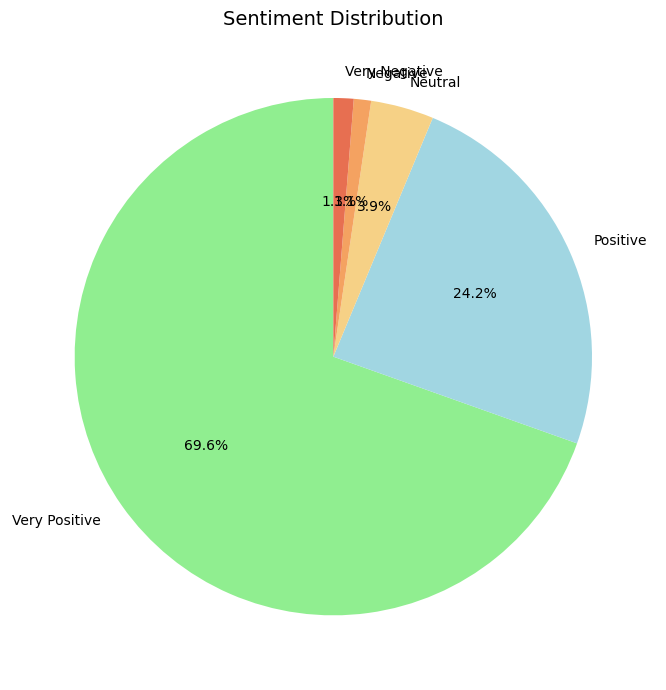

In [ ]:
# Define labels and their colors
labels = ['Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative']
colors = ['#90EE90', '#A1D6E2', '#F6D186', '#F4A261', '#E76F51']

# Get sentiment counts in the correct order
counts = data['sentiment'].value_counts().reindex(labels)

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution', fontsize=14)
plt.tight_layout()

plt.savefig('sentiment_distribution_fine_grained.png', dpi=300)
plt.show()


<ipython-input-18-a5beb90eba8b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


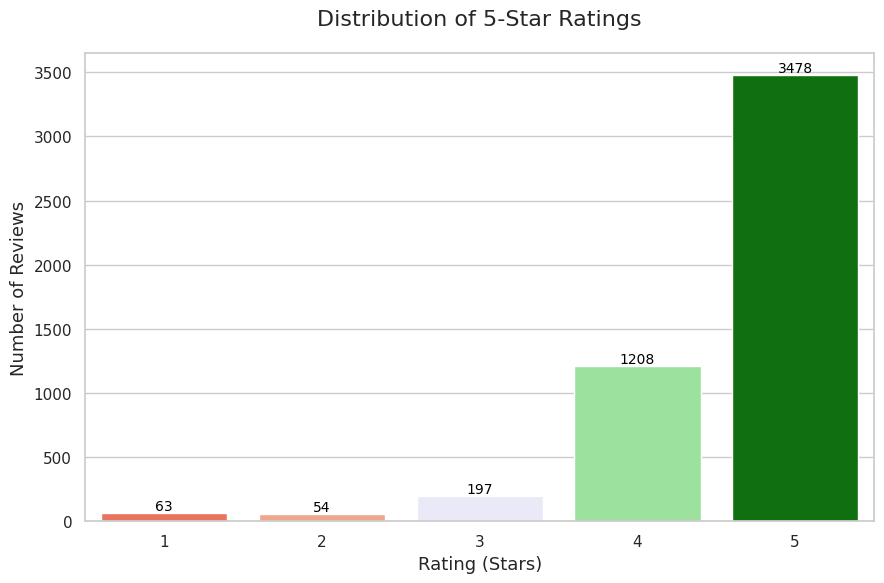

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors for 5-star ratings: 1 → 5
colors = ['#FF6347', '#FFA07A', '#E6E6FA', '#90EE90', '#008000']  # Red to Green gradient

# Set Seaborn visual style
sns.set(style='whitegrid')

# Create count plot
plt.figure(figsize=(9, 6))
sns.countplot(
    data=data,
    x='reviews.rating',
    order=sorted(data['reviews.rating'].unique()),  # Ensures bars are in 1-5 order
    palette=colors
)

# Customization
plt.title('Distribution of 5-Star Ratings', fontsize=16, pad=20)
plt.xlabel('Rating (Stars)', fontsize=13)
plt.ylabel('Number of Reviews', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Optionally, add count labels on top of bars
for p in plt.gca().patches:
    count = int(p.get_height())
    plt.gca().annotate(
        str(count),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10,
        color='black'
    )

# Final layout and save
plt.tight_layout()
plt.savefig('ratings_count_bar_chart.svg', format='svg', dpi=300)
plt.show()


# combine the second dataset to generalize the reviews

In [ ]:
# Define path to the chosen file
file_path2 = "/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"

In [ ]:
# Load dataset
df2 = pd.read_csv(file_path2)

# Preview
print(df2.shape)
df2.head()

(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [ ]:
df2.isnull().sum()

,0
id,0
dateAdded,0
dateUpdated,0
name,0
asins,0
brand,0
categories,0
primaryCategories,0
imageURLs,0
keys,0


In [ ]:
data2 = df2[["reviews.text", "reviews.rating"]]

data2.head()

,reviews.text,reviews.rating
0,I order 3 of them and one of the item is bad q...,3
1,Bulk is always the less expensive way to go fo...,4
2,Well they are not Duracell but for the price i...,5
3,Seem to work as well as name brand batteries a...,5
4,These batteries are very long lasting the pric...,5


In [ ]:
data2.isnull().sum()

,0
reviews.text,0
reviews.rating,0


In [ ]:
data2['reviews.rating'].value_counts().sort_index(ascending=False)

,count
reviews.rating,
5,19897
4,5648
3,1206
2,616
1,965


In [ ]:
# For mapping 1–5 star ratings
rating_to_score = {
    1: 0,  # Rating 1 → Very Negative (0)
    2: 1,  # Rating 2 → Negative (1)
    3: 2,  # Rating 3 → Neutral (2)
    4: 3,  # Rating 4 → Positive (3)
    5: 4   # Rating 5 → Very Positive (4)
}

# For mapping 0–4 sentiment scores to sentiment categories
score_to_label = {
    0: "Very Negative",       # Very Negative → NEGATIVE
    1: "Negative",       # Negative → NEGATIVE
    2: "Neutral",        # Neutral → NEUTRAL
    3: "Positive",       # Positive → POSITIVE
    4: "Very Positive"        # Very Positive → POSITIVE
}

# Apply the correct mapping for star ratings to sentiment scores
data2['sentiment_score'] = data2['reviews.rating'].map(rating_to_score)

# Now, map sentiment scores to sentiment labels
data2['sentiment'] = data2['sentiment_score'].map(score_to_label)

# Display updated data
data2.head()

<ipython-input-26-4a4ba13125e9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sentiment_score'] = data2['reviews.rating'].map(rating_to_score)
<ipython-input-26-4a4ba13125e9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sentiment'] = data2['sentiment_score'].map(score_to_label)


,reviews.text,reviews.rating,sentiment_score,sentiment
0,I order 3 of them and one of the item is bad q...,3,2,Neutral
1,Bulk is always the less expensive way to go fo...,4,3,Positive
2,Well they are not Duracell but for the price i...,5,4,Very Positive
3,Seem to work as well as name brand batteries a...,5,4,Very Positive
4,These batteries are very long lasting the pric...,5,4,Very Positive


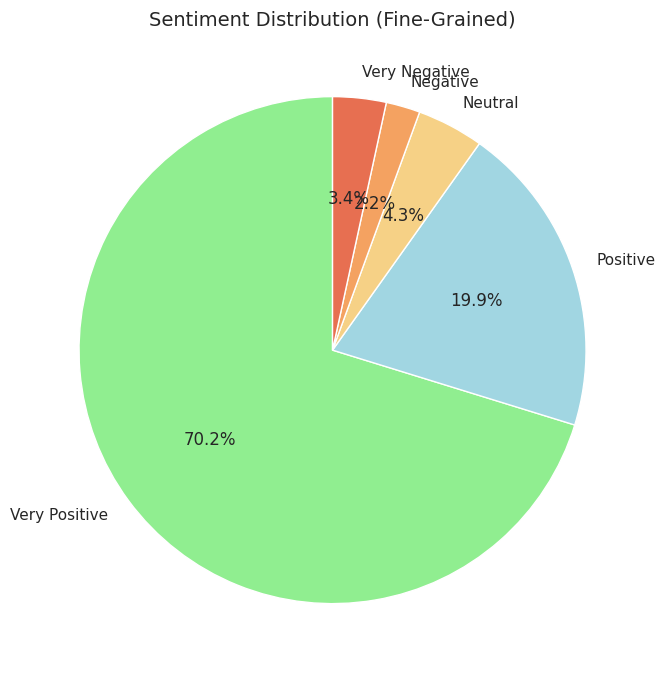

In [ ]:
# Define labels and their colors
labels = ['Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative']
colors = ['#90EE90', '#A1D6E2', '#F6D186', '#F4A261', '#E76F51']

# Get sentiment counts in the correct order
counts = data2['sentiment'].value_counts().reindex(labels)

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution (Fine-Grained)', fontsize=14)
plt.tight_layout()

plt.savefig('sentiment_distribution_fine_grained.png', dpi=300)
plt.show()


In [ ]:
# Drop rows with 'Very Positive' or 'Positive' sentiment
data2 = data2[~data2['sentiment'].isin(['Very Positive', 'Positive'])]

# Display the updated DataFrame
data2.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
0,I order 3 of them and one of the item is bad q...,3,2,Neutral
8,These do not hold the amount of high power jui...,3,2,Neutral
11,When I first started getting the Amazon basic ...,3,2,Neutral
16,I don't know if I would buy thus brand again s...,1,0,Very Negative
17,In my opinion these did not last anywhere near...,2,1,Negative


In [ ]:
data.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
0,I thought it would be as big as small paper bu...,3,2,Neutral
1,This kindle is light and easy to use especiall...,5,4,Very Positive
2,Didnt know how much i'd use a kindle so went f...,4,3,Positive
3,I am 100 happy with my purchase. I caught it o...,5,4,Very Positive
4,Solid entry level Kindle. Great for kids. Gift...,5,4,Very Positive


In [ ]:
# add data2 to data
datamodified = pd.concat([data, data2], ignore_index=True)
datamodified.head()


,reviews.text,reviews.rating,sentiment_score,sentiment
0,I thought it would be as big as small paper bu...,3,2,Neutral
1,This kindle is light and easy to use especiall...,5,4,Very Positive
2,Didnt know how much i'd use a kindle so went f...,4,3,Positive
3,I am 100 happy with my purchase. I caught it o...,5,4,Very Positive
4,Solid entry level Kindle. Great for kids. Gift...,5,4,Very Positive


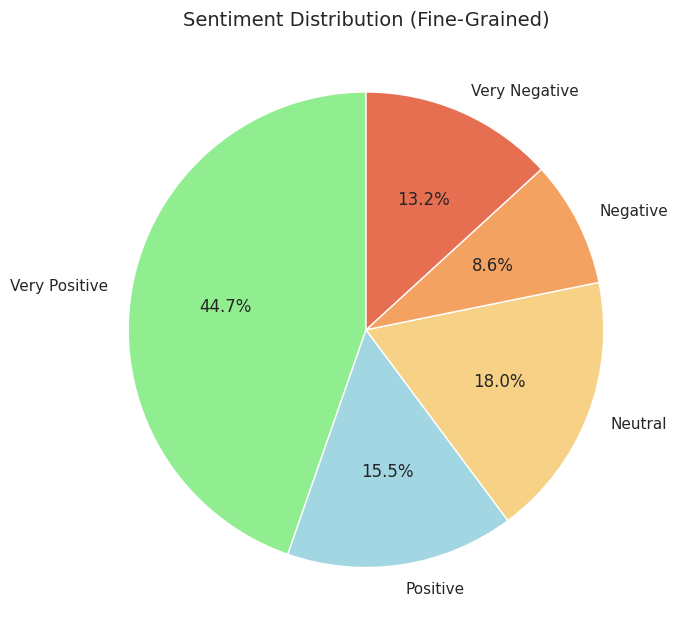

In [ ]:
# Define labels and their colors
labels = ['Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative']
colors = ['#90EE90', '#A1D6E2', '#F6D186', '#F4A261', '#E76F51']

# Get sentiment counts in the correct order
counts = datamodified['sentiment'].value_counts().reindex(labels)

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution (Fine-Grained)', fontsize=14)
plt.tight_layout()

plt.savefig('sentiment_distribution_fine_grained.png', dpi=300)
plt.show()

As you can see it's much better than before

*   if you have time try SMOTE (Synthetic Minority Oversampling Technique) or class weight techniques




In [ ]:
finaldata = datamodified[['reviews.text', 'sentiment_score']]
finaldata.columns = ['sentence', 'label']
finaldata.to_csv('finaldata.csv', index=False)

The output file “finaldata.csv” will include two columns: “sentence,” which contains the processed text, and “label,” which holds the associated target values.

In [ ]:
# Assuming 'finaldata.csv' is in the current working directory.
import pandas as pd

try:
    df_final = pd.read_csv('finaldata.csv')
    print(df_final.head())  # Display the first few rows
    print(df_final.info())   # Display info about the DataFrame
except FileNotFoundError:
    print("Error: 'finaldata.csv' not found.  Please ensure the file exists in the current directory.")



                                            sentence  label
0  I thought it would be as big as small paper bu...      2
1  This kindle is light and easy to use especiall...      4
2  Didnt know how much i'd use a kindle so went f...      3
3  I am 100 happy with my purchase. I caught it o...      4
4  Solid entry level Kindle. Great for kids. Gift...      4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  7787 non-null   object
 1   label     7787 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 121.8+ KB
None


In [ ]:
print(df_final['label'].value_counts())

label
4    3478
2    1403
3    1208
0    1028
1     670
Name: count, dtype: int64


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
from datasets import load_dataset
raw_dataset = load_dataset('csv', data_files = 'finaldata.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 7787
    })
})

In [ ]:
from datasets import ClassLabel

# Convert 'label' column to ClassLabel type
raw_dataset = raw_dataset.cast_column('label', ClassLabel(names=["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]))

# Now perform the stratified split
split = raw_dataset['train'].train_test_split(
    test_size=0.3,
    seed=42,
    stratify_by_column="label"
)



Casting the dataset:   0%|          | 0/7787 [00:00<?, ? examples/s]

In [ ]:
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 5450
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 2337
    })
})

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from transformers import DataCollatorWithPadding
import torch
import numpy as np
import evaluate

In [ ]:


# 1. Load dataset
raw_dataset = load_dataset('csv', data_files='finaldata.csv')
dataset = raw_dataset['train'].train_test_split(test_size=0.3, seed=42)

# Tokenisation

In [ ]:
# 2. Load tokenizer and model
model_name = "tabularisai/multilingual-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/902 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

In [ ]:
# 3. Tokenize data
def preprocess_function(examples):
    return tokenizer(examples['sentence'], truncation=True, padding=True, max_length=512)

tokenized_dataset = dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/5450 [00:00<?, ? examples/s]

Map:   0%|          | 0/2337 [00:00<?, ? examples/s]

In [ ]:
# 4. Set up data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# 5. Load evaluation metric
accuracy = evaluate.load("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
# 6. Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="wandb",  # Log to Weights & Biases
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# 7. Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

<ipython-input-53-2fc13f183473>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# 8. Train the model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: aalshehriraneem (aalshehriraneem-ironhack) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,0.883300,0.807440,0.680359
2,0.544000,0.748995,0.720154
3,0.343900,0.746574,0.742833
4,0.343600,0.786357,0.743261


TrainOutput(global_step=1364, training_loss=0.5944682566825945, metrics={'train_runtime': 288.571, 'train_samples_per_second': 75.545, 'train_steps_per_second': 4.727, 'total_flos': 2887943789568000.0, 'train_loss': 0.5944682566825945, 'epoch': 4.0})

✅ Notes
You must be logged in to W&B (wandb.login() or have the API key set).

The model expects labels as integers from 0 to 4, which match:

0: Very Negative

1: Negative

2: Neutral

3: Positive

4: Very Positive

# Evaluate the model

In [ ]:
# Evaluate the model
eval_results = trainer.evaluate()
print(f"Evaluation Results: {eval_results}")


Evaluation Results: {'eval_loss': 0.7863565683364868, 'eval_accuracy': 0.7432605905006419, 'eval_runtime': 7.9424, 'eval_samples_per_second': 294.245, 'eval_steps_per_second': 18.508, 'epoch': 4.0}


# Save the Model

In [ ]:
# Save the model and tokenizer
model.save_pretrained('./saved_model')
tokenizer.save_pretrained('./saved_model')


('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/vocab.txt',
 './saved_model/added_tokens.json',
 './saved_model/tokenizer.json')

# Load the Saved Model

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained('./saved_model')
tokenizer = AutoTokenizer.from_pretrained('./saved_model')

# Make Predictions

In [ ]:
from transformers import pipeline

# Load the saved model using pipeline
saved_model = pipeline('text-classification', model='./saved_model', tokenizer='./saved_model')

# Example prediction
text = "I love this product!"
prediction = saved_model(text)
print(prediction)


Device set to use cuda:0


[{'label': 'Very Positive', 'score': 0.9384229779243469}]


In [ ]:
# Example prediction with a different review text
text2 = "This product is absolutely terrible. I would not recommend it to anyone."
prediction2 = saved_model(text2)
prediction2


[{'label': 'Very Negative', 'score': 0.9837528467178345}]

In [ ]:
# Example prediction with a different review text
text3 = "The product works as expected, but nothing extraordinary."
prediction3 = saved_model(text3)
prediction3

[{'label': 'Neutral', 'score': 0.9883390665054321}]

Accuracy: 0.7432605905006419
F1 Score: 0.6781849402623079


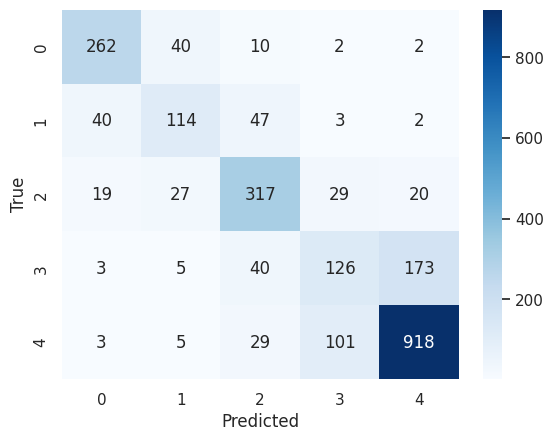

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the model
predictions = trainer.predict(tokenized_dataset['test'])
pred_labels = np.argmax(predictions.predictions, axis=-1)

# Calculate Accuracy
accuracy = accuracy_score(tokenized_dataset['test']['label'], pred_labels)
print(f"Accuracy: {accuracy}")

# Calculate F1 Score
f1 = f1_score(tokenized_dataset['test']['label'], pred_labels, average='macro')
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(tokenized_dataset['test']['label'], pred_labels)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Calculate Precision, Recall, and F1 for each class
precision = precision_score(tokenized_dataset['test']['label'], pred_labels, average=None)
recall = recall_score(tokenized_dataset['test']['label'], pred_labels, average=None)
f1_class = f1_score(tokenized_dataset['test']['label'], pred_labels, average=None)

# Display Precision, Recall, and F1 for each class
for i, (p, r, f) in enumerate(zip(precision, recall, f1_class)):
    print(f"Class {i}: Precision = {p*100:.2f}%, Recall = {r*100:.2f}%, F1-score = {f*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(tokenized_dataset['test']['label'], pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], yticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()